import file 

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 


read new data after clean

In [2]:
series=pd.read_csv('series_after_cleaning.csv') 


read splits 

In [3]:
splits = pd.read_excel("splits_series.xlsx", sheet_name=None)


EDA

What are the basic statistics for numerical columns like worldwide_gross, year, and votes_number?


In [4]:
series.describe()

,rating,votes,start_year
count,1021.000000,1.021000e+03,1021.000000
mean,7.935357,1.056794e+05,2011.159647
std,0.671093,1.599385e+05,10.858221
min,6.000000,2.503300e+04,1951.000000
25%,7.500000,3.502200e+04,2006.000000
50%,8.000000,5.363500e+04,2014.000000
75%,8.400000,1.097020e+05,2019.000000
max,9.500000,2.250253e+06,2024.000000


In [6]:
import plotly.express as px

# Assuming 'movie' is your DataFrame
numeric_columns = series.select_dtypes(include='number')
# Create histograms for each numeric column
for column in numeric_columns.columns:
    fig = px.histogram(series, x=column, title=f'Histogram for {column}',color_discrete_sequence=['Tomato'])
    fig.show()



what are the outlires? shoud i drop it ?

In [7]:
import plotly.express as px

numeric_columns = series.select_dtypes(include='number')

for column in numeric_columns.columns:
    fig = px.box(series, x=column, title=f'Box Plot for {column}')
    fig.show()


In [8]:
outlier={}
for i in numeric_columns:

    Q1 = series[i].quantile(0.25)
    Q3 = series[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = series[(series[i] < Q1 - 1.5 * IQR) | (series[i] > Q3 + 1.5 * IQR)]
    outlier[i]=outliers

for i in numeric_columns:
    display(outlier[i][[i,"title"]].head())




,rating,title
1016,6.1,Echo
1017,6.1,Black Lightning
1018,6.1,The Langoliers
1019,6.0,Joey
1020,6.0,Cursed


,votes,title
0,2095544,Breaking Bad
3,514455,Band of Brothers
6,370584,The Wire
7,353908,Avatar: The Last Airbender
8,845949,Chernobyl


,start_year,title
12,1980,Cosmos
18,1973,The World at War
24,1959,The Twilight Zone
38,1981,Only Fools and Horses
79,1975,Fawlty Towers


Genre Analysis:



Which parentalguide are most common in the dataset?

In [9]:
import plotly.express as px

# Assuming 'movie' is your DataFrame
top_five_genres = series["parentalguide"].value_counts().head(10).reset_index(name='count')

fig = px.treemap(top_five_genres, 
                 path=['parentalguide'],  # Use 'index' column for hierarchy
                 values='count', 
                 title='Top Five Parental Guides - Treemap',
                 color='count', 
                 color_continuous_scale='bluered',)



fig.show()


Director, stars, Production_company, Language, Genre, Writer Insights

Question: Who are the most frequently involved directors, stars, and writers in the dataset?

In [ ]:
q2=splits.copy()
q2.pop("country")
q2.pop("stars")

In [40]:

import plotly.express as px

for i, j in q2.items():

    top_values = j[i].value_counts().head(10).reset_index(name='count')
    
    # Calculate percentage
    total_count = top_values['count'].sum()
    top_values['percentage'] = (top_values['count'] / total_count) * 100

    fig = px.bar(top_values, x='count', y=i, orientation='h',
                 color='count', text='percentage',
                 title=f'Top {i} ',
                 labels={'count': 'Count', 'index': i, 'percentage': 'Percentage'})

    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.update_layout(yaxis=dict(categoryorder='total ascending'))
    fig.show()


Country Analysis:



Question: What is the distribution of countries in the dataset?


In [17]:
import plotly.express as px

top_countries = splits["country"]["country"].value_counts().head(30).reset_index(name='count')
country_mapping = {
    'United States': 'USA',
    'United Kingdom': 'GBR',
    'France': 'FRA',
    'Canada': 'CAN',
    'Germany': 'DEU',
    'Japan': 'JPN',
    'India': 'IND',
    'Australia': 'AUS',
    'China': 'CHN',
    'Italy': 'ITA',
    'Spain': 'ESP',
    'Mexico': 'MEX',
    'Hong Kong': 'HKG',
    'Sweden': 'SWE',
    'Denmark': 'DNK',
    'New Zealand': 'NZL',
    'Belgium': 'BEL',
    'South Korea': 'KOR',
    'Ireland': 'IRL',
    'Czech Republic': 'CZE',
    'Switzerland': 'CHE',
    'Hungary': 'HUN',
    'Norway': 'NOR',
    'United Arab Emirates': 'ARE',
    'Netherlands': 'NLD',
    'South Africa': 'ZAF',
    'Poland': 'POL',
    'West Germany': 'DEU',  # Assuming you want to use 'DEU' for Germany
    'Austria': 'AUT',
    'Turkey': 'TUR'
}
# Assuming 'df' is your DataFrame
top_countries['country'] = top_countries['country'].map(country_mapping)

# Check the DataFrame to verify the mapping
top_countries
# Assuming 'df' is your DataFrame
fig = px.choropleth(top_countries, 
                    locations="country",
                    color="count",
                    hover_name="country",
                    title="Choropleth Map of User Percent by Country",
                    projection="natural earth",
                    )

fig.show()


description and titles analysis 
what are the most words appear in this columns

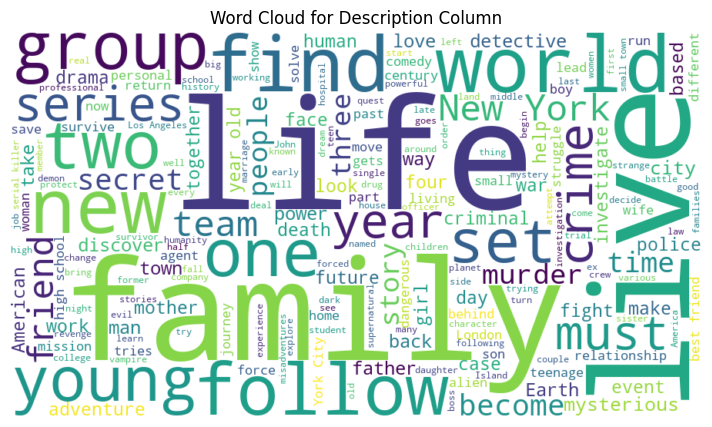

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(series['description'].astype(str))

wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Description Column')
plt.show()


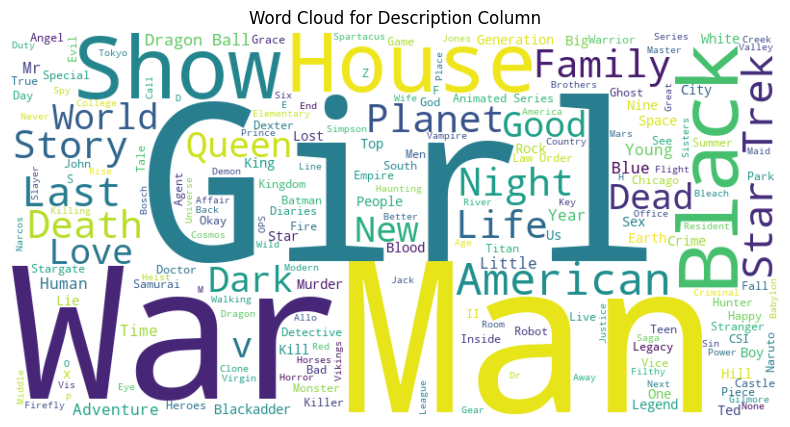

In [14]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(series['title'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud for Description Column')
plt.show()


In [15]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

text_data = ' '.join(series['title'].astype(str))

# Tokenize the text into words, excluding stopwords
words = [word.lower() for word in word_tokenize(text_data) if word.isalpha() and word.lower() not in stop_words]

# Use Counter to count word occurrences
word_counter = Counter(words)

# Get the most common words and their counts
most_common_words = word_counter.most_common(30)  # Change 10 to the desired number of top words

print("Top 30 most common words in the 'description' column (excluding stopwords):")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 30 most common words in the 'description' column (excluding stopwords):
star: 12
show: 11
man: 11
house: 10
black: 9
girls: 9
last: 8
dragon: 8
trek: 8
american: 8
planet: 7
story: 7
life: 7
family: 7
night: 7
death: 6
ball: 6
dark: 6
wars: 6
good: 6
dead: 6
new: 6
blue: 5
world: 5
war: 5
series: 5
time: 5
young: 5
love: 5
little: 5


[nltk_data] Downloading package stopwords to C:\Users\mohamed
[nltk_data]     elsayed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download nltk resources if not already downloaded
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

text_data = ' '.join(series['description'].astype(str))

# Tokenize the text into words, excluding stopwords
words = [word.lower() for word in word_tokenize(text_data) if word.isalpha() and word.lower() not in stop_words]

# Use Counter to count word occurrences
word_counter = Counter(words)

# Get the most common words and their counts
most_common_words = word_counter.most_common(30)  # Change 10 to the desired number of top words

# Print or display the results
print("Top 30 most common words in the 'description' column (excluding stopwords):")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 30 most common words in the 'description' column (excluding stopwords):
new: 122
life: 115
family: 106
young: 84
world: 83
lives: 72
series: 68
two: 65
city: 65
follows: 60
one: 57
group: 54
years: 53
york: 50
must: 50
friends: 48
find: 47
school: 45
town: 44
team: 44
man: 43
story: 41
war: 40
three: 40
set: 39
people: 39
mysterious: 38
together: 35
back: 34
murder: 34


[nltk_data] Downloading package stopwords to C:\Users\mohamed
[nltk_data]     elsayed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


are there realtions among the numrical  values 

<Axes: >

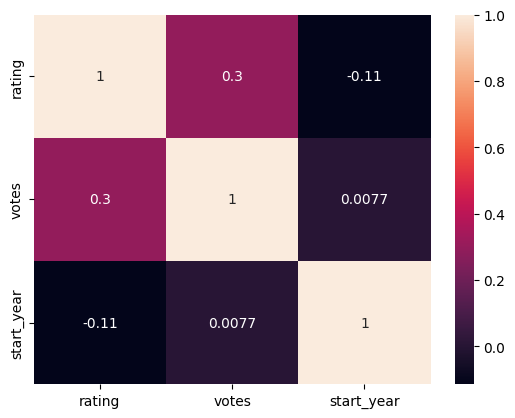

In [19]:
sns.heatmap(numeric_columns.corr(),annot=True)

year analysis 

In [20]:


import plotly.express as px
df=series[series["start_year"].isin(series["start_year"].value_counts()[series["start_year"].value_counts() > 10].index)].groupby("start_year")["rating"].mean().reset_index(name='rating')
fig = px.line(df, x='start_year', y='rating', title='Line Plot of Rating Over Time')
fig.show()


In [29]:


import plotly.express as px
df=series[series["start_year"].isin(series["start_year"].value_counts()[series["start_year"].value_counts() > 10].index)].groupby("start_year")["votes"].mean().reset_index(name='votes')
fig = px.line(df, x='start_year', y='votes', title='Line Plot of votes Over Time')
fig.show()


In [51]:
df=series["end_year"].value_counts().head(5).reset_index(name="count")

fig = px.treemap(df, 
                 path=['end_year'],  # Use 'index' column for hierarchy
                 values='count', 
                 color='count', 
                 color_continuous_scale='bluered',)
fig.show()


genre analysis 

In [22]:
def split_values_genre(name):
    namelist=[]
    titles=[]
    coulmn=series["genre"].dropna()
    for i in range(len(coulmn)):
        value=coulmn.str.split(",").iloc[i]
        if len(value)>1:
            for j in value:
                namelist.append(j)
                titles.append(series[name].iloc[i])
        else:
            namelist.append(value[0])  
            titles.append(series[name].iloc[i])
    df=pd.DataFrame({name:titles,"genre":namelist})
    return df
for i in series.select_dtypes(include='number').drop(["rating"], axis=1).columns:

    df = split_values_genre(i)

    sorted_df = df.groupby("genre")[i].mean().reset_index().sort_values(i, ascending=True).head(10)

# Creating a bar chart using plotly express
    fig = px.bar(sorted_df, y='genre', x=i, orientation='h',
             color=i, text=i,
             title=f' Genres by Mean {i}')


# Show the plot
    fig.show()



rating analysis

In [30]:
def split_values(name,numric):
    namelist=[]
    titles=[]
    coulmn=series[name].dropna()
    for i in range(len(coulmn)):
        value=coulmn.str.split(",").iloc[i]
        if len(value)>1:
            for j in value:
                namelist.append(j)
                titles.append(series[numric].iloc[i])
        else:
            namelist.append(value[0])  
            titles.append(series[numric].iloc[i])
    df=pd.DataFrame({numric:titles,name:namelist})
    return df
for i in splits.keys():

    df = split_values(i,"rating")
    df = df[df[i].isin(df[i].value_counts()[df[i].value_counts() > 10].index)]
    

    sorted_df = df.groupby(i)["rating"].mean().reset_index().sort_values("rating", ascending=False).head(10)

    # Creating a bar chart using plotly express
    display(sorted_df)

,country,rating
3,India,8.696000
2,Germany,8.447059
1,France,8.316667
5,Poland,8.314286
4,Japan,8.289831
7,United Kingdom,8.239474
6,South Korea,7.942857
8,United States,7.838161
0,Canada,7.817241


,creators,rating
0,Ryan Murphy,7.427273


,stars,rating


,production_company,rating
9,Contagious Online Media Network,8.981818
6,British Broadcasting Corporation (BBC),8.505714
12,Home Box Office (HBO),8.385294
11,FX Productions,8.168750
13,NBC Universal Television,8.166667
1,3 Arts Entertainment,8.129167
16,Sony Pictures Television,8.118750
0,20th Century Fox Television,8.000000
15,Paramount Television,7.993333
8,Cartoon Network Studios,7.958333


,language,rating
5,Hindi,8.535484
7,Japanese,8.212676
6,Italian,8.173077
3,German,8.154762
2,French,8.151852
13,Turkish,8.116667
12,Spanish,8.076812
11,Russian,8.051613
10,Mandarin,8.046667
0,Arabic,7.941667


,genre,rating
6,Documentary,8.564706
17,Sport,8.323077
10,History,8.280645
2,Animation,8.213281
3,Biography,8.138235
16,Short,8.064286
12,Music,8.008333
4,Comedy,7.967988
5,Crime,7.952471
18,Thriller,7.915584


parentalguide

In [33]:
import plotly.express as px
import seaborn as sns
# Assuming you have a DataFrame 'series' with numerical columns

for i in series.select_dtypes(include='number').drop(["start_year"],axis=1).columns:  # select numeric columns only, drop "rating" and "year
    df=series.groupby("parentalguide")[i].mean().reset_index(name=i).sort_values(by=[i],ascending=False) 
    fig = px.bar(df, x="parentalguide", y=i, title=f'Parental Guide by Mean {i}',color=i)
    fig.show()

    # Reverse the sorting of the bars

    # Show the plot
 
 


